# __Importing Pandas/Numpy/Zipfile__

In [194]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import json

# Data Source #1 - TN Movies Budget (from class dataset)

# _Cleaning TV movies budget_

In [208]:
## opening read file
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')

In [209]:
### changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [211]:
### removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

### removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

### removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [213]:
##renaming movie column to title
budget = budget.rename(columns = {"movie":"title"})

# _Analyzing TV movies Budget_

In [219]:
#Checking TV Movies budget data
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [220]:
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [223]:
#finding datset age range and ranges 105 years

oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])
movie_range = relativedelta(newest_movie, oldest_movie).years

print(oldest_movie)
print(newest_movie)
print(movie_range)

1915-02-08 00:00:00
2020-12-31 00:00:00
105


In [225]:
##defining and sorting top 25 grossing movies

top_gross_movies = budget.sort_values(by='worldwide_gross',ascending=False).head(25)
top_gross_movies


,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [226]:
top_gross_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(25)
top_gross_movies

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


# JOINING MOVIES AND BUDGETS TABLES

In [75]:
budget_movie = pd.merge(top_movies_200, budget, on='title', how='left')
display(budget_movie)

,id_x,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,87.0,1972-03-15,7000000.0,134966411.0,268500000.0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,37.0,1994-09-23,25000000.0,28241469.0,28307092.0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,NaN,NaT,NaN,NaN,NaN
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,NaN,NaT,NaN,NaN,NaN
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,15383,L'Armée des ombres,17.461,1969-09-10,Army of Shadows,8.0,524,10752,18,53,0,NaN,NaT,NaN,NaN,NaN
336,10515,天空の城ラピュタ,43.910,1986-08-02,Castle in the Sky,8.0,3480,12,14,16,28,NaN,NaT,NaN,NaN,NaN
337,698948,Thirteen Lives,47.566,2022-07-18,Thirteen Lives,8.0,920,18,53,28,12,NaN,NaT,NaN,NaN,NaN
338,698508,Redeeming Love,49.975,2022-01-21,Redeeming Love,8.0,229,10749,18,36,0,NaN,NaT,NaN,NaN,NaN


# Data Source #2 - TMBD - Pulled from API

In [343]:
import requests
import pandas as pd


# creating loop to pull 1000 records from top rated movies
# set page numbers
page = 1
total_pages = 200

# empty list
data_list = []

# loop to iterate
while page <= total_pages:
    # make a request to the API with the current page number
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=' + str(page))

    # response
    data = response.json()['results']
    # append data to list
    data_list.append(data)

    # increase page number
    page += 1

In [344]:
# concatenate the data into a pandas DataFrame
top_movies = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)

In [345]:
#reindexing dataframe
top_movies = top_movies .reset_index(drop=True)

In [346]:
# split the list into columns
split_movies = top_movies ['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_movies = pd.concat([top_movies, split_movies], axis=1)

In [347]:
##dropping null values
top_movies.dropna(axis=0, how='any', subset=['title'], inplace=True)


In [348]:
#dropping columns that aren't needed

top_movies = top_movies.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video',
                          'original_language', 'overview','col_7', 'col_8', 'col_9',], axis=1)

In [349]:
#renaming the genre columns
top_movies.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4', 'col_5':'genre_id_5', 'col_6':'genre_id_6'}, inplace = True)

In [350]:
##changing N/A variables to 0
top_movies = top_movies.fillna(0)

In [351]:
## converting  column type from float64 to int

top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']] = top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']].astype(int)

In [352]:
## converting 'release_date' column type from integer to datetime

top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])

In [353]:
##information about first and last movie entry in data

first_movie = min(top_movies['release_date'])
last_movie = max(top_movies['release_date'])

print(first_movie)
print(last_movie)

1895-06-10 00:00:00
2023-03-01 00:00:00


In [354]:
most_popular = top_movies.sort_values(by='popularity',ascending=False).head(20)
most_popular

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
2020,505642,Black Panther: Wakanda Forever,2525.408,2022-11-09,Black Panther: Wakanda Forever,7.3,3922,28,12,878,0,0,0
34,315162,Puss in Boots: The Last Wish,2158.063,2022-12-07,Puss in Boots: The Last Wish,8.4,4358,16,12,35,10751,0,0
568,937278,A Man Called Otto,1977.383,2022-12-28,A Man Called Otto,7.8,540,35,18,0,0,0,0
3773,677179,Creed III,1627.738,2023-03-01,Creed III,6.9,207,18,28,0,0,0,0
793,76600,Avatar: The Way of Water,1136.205,2022-12-14,Avatar: The Way of Water,7.7,5649,878,12,28,0,0,0
1523,536554,M3GAN,1064.609,2022-12-28,M3GAN,7.5,1937,878,27,35,0,0,0
2892,436270,Black Adam,783.781,2022-10-19,Black Adam,7.1,4389,28,14,878,0,0,0
311,785084,The Whale,628.700,2022-12-09,The Whale,8.0,846,18,0,0,0,0,0
1835,653851,Devotion,584.643,2022-11-23,Devotion,7.4,353,10752,36,18,0,0,0
2194,497828,Triangle of Sadness,566.455,2022-09-23,Triangle of Sadness,7.3,926,35,18,0,0,0,0


# ANALYZING/VISUALIZING GENRE

In [380]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              4000 non-null   int64         
 1   original_title  4000 non-null   object        
 2   popularity      4000 non-null   float64       
 3   release_date    4000 non-null   datetime64[ns]
 4   title           4000 non-null   object        
 5   vote_average    4000 non-null   float64       
 6   vote_count      4000 non-null   int64         
 7   genre_id_1      4000 non-null   int64         
 8   genre_id_2      4000 non-null   int64         
 9   genre_id_3      4000 non-null   int64         
 10  genre_id_4      4000 non-null   int64         
 11  genre_id_5      4000 non-null   int64         
 12  genre_id_6      4000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 437.5+ KB


In [381]:
##creating new dataframe with only the top genres

top_genres = top_movies[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.Series.value_counts)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,1,661,1912,3328,3819,3954.0
12,218,205,134,48,18,3.0
14,90,129,121,87,38,4.0
16,347,148,58,10,2,2.0
18,1365,782,233,53,6,2.0
27,119,72,39,15,2,2.0
28,385,208,93,31,6,6.0
35,595,338,164,54,16,2.0
36,28,167,98,26,2,NaN
37,47,17,13,5,2,1.0


In [382]:
##changing N/A variables to 0
top_genres = top_genres.fillna(0)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,1,661,1912,3328,3819,3954.0
12,218,205,134,48,18,3.0
14,90,129,121,87,38,4.0
16,347,148,58,10,2,2.0
18,1365,782,233,53,6,2.0
27,119,72,39,15,2,2.0
28,385,208,93,31,6,6.0
35,595,338,164,54,16,2.0
36,28,167,98,26,2,0.0
37,47,17,13,5,2,1.0


In [383]:
##creating a genre total column that sums up the total values and making it a integer
top_genres['genre_total'] = top_genres.sum(axis=1)


In [384]:
#dropping first row
top_genres.drop([0],inplace=True)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total
12,218,205,134,48,18,3.0,626.0
14,90,129,121,87,38,4.0,469.0
16,347,148,58,10,2,2.0,567.0
18,1365,782,233,53,6,2.0,2441.0
27,119,72,39,15,2,2.0,249.0
28,385,208,93,31,6,6.0,729.0
35,595,338,164,54,16,2.0,1169.0
36,28,167,98,26,2,0.0,321.0
37,47,17,13,5,2,1.0,85.0
53,114,274,256,82,13,0.0,739.0


In [385]:
##dropping columns

top_genres_total= top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5','genre_id_6'])
top_genres_total

,genre_total
12,626.0
14,469.0
16,567.0
18,2441.0
27,249.0
28,729.0
35,1169.0
36,321.0
37,85.0
53,739.0


In [386]:
##creating column with the genre names

top_genres_total['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Science Fiction', 'Mystery', 'Music','Romance','Family', 'War', 'TV Movie']

In [388]:
##changing order of the columns

top_genres_total = top_genres_total [['genre_name', 'genre_total']]


In [389]:
top_genres_total

,genre_name,genre_total
12,Adventure,626.0
14,Fantasy,469.0
16,Animation,567.0
18,Drama,2441.0
27,Horror,249.0
28,Action,729.0
35,Comedy,1169.0
36,History,321.0
37,Western,85.0
53,Thriller,739.0


In [390]:
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

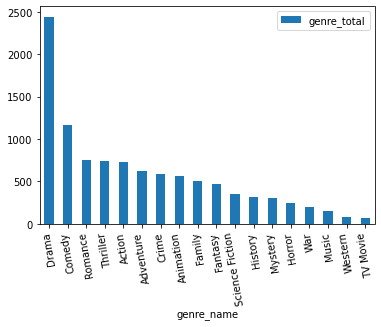

In [392]:
ax = top_genres_total.plot.bar(x='genre_name', y='genre_total', rot=100)